<a href="https://colab.research.google.com/github/LydP/Divvy-Bike-Share-Data-Analysis/blob/main/Divvy_Trip_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Divvy Bike Sharing Data Analysis

This is my analysis of Divvy trip data for the Google Data Analytics certificate capstone project. My certificate can be seen [here](https://www.credly.com/badges/6e51f2de-b45a-4e2e-bff1-3da04eff93de). 

## Introduction

Divvy ([www.divvybikes.com](https://www.divvybikes.com/)) is a bike sharing company in Chicago, IL. They have two broad categories of customers: casual members and full members. Casual members are those who rent a bike for a single trip or those who pay for a full-day pass. Full members are those who pay an annual subscription to use Divvy bikes at any time. For this analysis, I found the differences between casual members and full members for the purpose of discovering how to convert casual members to full members.

## Data Retrieval and Preparation

The data used in this analysis are provided for public use by Divvy according the the [Divvy Data License Agreement](https://www.divvybikes.com/data-license-agreement). The data are located [here](https://divvy-tripdata.s3.amazonaws.com/index.html). I used files ```202004-divvy-tripdata.zip``` through ```202108-divvy-tripdata.zip```. The full list of files that I used is below.

```
202004-divvy-tripdata.zip
202005-divvy-tripdata.zip
202006-divvy-tripdata.zip
202007-divvy-tripdata.zip
202008-divvy-tripdata.zip
202009-divvy-tripdata.zip
202010-divvy-tripdata.zip
202011-divvy-tripdata.zip
202012-divvy-tripdata.zip
202101-divvy-tripdata.zip
202102-divvy-tripdata.zip
202103-divvy-tripdata.zip
202104-divvy-tripdata.zip
202105-divvy-tripdata.zip
202106-divvy-tripdata.zip
202107-divvy-tripdata.zip
202108-divvy-tripdata.zip
```

Each ZIP folder contains the data in a CSV file. I combined the files into a single CSV with the following Python code, which adds ```ride_length``` and ```day_of_week``` columns to every CSV file and consequently to the final combined file. 


In [ ]:
# retrieve and unzip data

!pip install gdown
# retrieves a ZIP of the CSV files from my Google Drive
!gdown https://drive.google.com/uc?id=1MAUmtn4W1iUWi_UpBohJ5u7ov5kVom-t

!unzip "raw_data.zip" -d "raw_data"

Downloading...
From: https://drive.google.com/uc?id=1MAUmtn4W1iUWi_UpBohJ5u7ov5kVom-t
To: /content/raw_data.zip
100% 272M/272M [00:04<00:00, 64.8MB/s]
Archive:  raw_data.zip
  inflating: raw_data/202004-divvy-tripdata.csv  
  inflating: raw_data/202005-divvy-tripdata.csv  
  inflating: raw_data/202006-divvy-tripdata.csv  
  inflating: raw_data/202007-divvy-tripdata.csv  
  inflating: raw_data/202008-divvy-tripdata.csv  
  inflating: raw_data/202009-divvy-tripdata.csv  
  inflating: raw_data/202010-divvy-tripdata.csv  
  inflating: raw_data/202011-divvy-tripdata.csv  
  inflating: raw_data/202012-divvy-tripdata.csv  
  inflating: raw_data/202101-divvy-tripdata.csv  
  inflating: raw_data/202102-divvy-tripdata.csv  
  inflating: raw_data/202103-divvy-tripdata.csv  
  inflating: raw_data/202104-divvy-tripdata.csv  
  inflating: raw_data/202105-divvy-tripdata.csv  
  inflating: raw_data/202106-divvy-tripdata.csv  
  inflating: raw_data/202107-divvy-tripdata.csv  
  inflating: raw_data/2021

In [ ]:
import glob
import pandas as pd

# raw_data contains the raw data from Divvy System Data
raw_csv = glob.glob(r'raw_data/*.csv')

csv_list = []
for csv in raw_csv:
    csv_input = pd.read_csv(csv, header=0, index_col=0)
    started_at = pd.to_datetime(csv_input['started_at'])
    ended_at = pd.to_datetime(csv_input['ended_at'])
    csv_input['ride_length'] = ended_at - started_at
    # Monday = 0, Sunday = 6
    csv_input['day_of_week'] = started_at.dt.dayofweek

    csv_input.to_csv(csv)
    csv_list.append(csv_input)
    print('{} completed'.format(csv))

csv_df = pd.concat(csv_list)
csv_df.to_csv(r'raw_data/divvy-tripdata-full.csv')

raw_data/202103-divvy-tripdata.csv completed
raw_data/202108-divvy-tripdata.csv completed
raw_data/202101-divvy-tripdata.csv completed
raw_data/202010-divvy-tripdata.csv completed
raw_data/202007-divvy-tripdata.csv completed
raw_data/202004-divvy-tripdata.csv completed
raw_data/202008-divvy-tripdata.csv completed
raw_data/202011-divvy-tripdata.csv completed
raw_data/202009-divvy-tripdata.csv completed
raw_data/202005-divvy-tripdata.csv completed
raw_data/202012-divvy-tripdata.csv completed
raw_data/202105-divvy-tripdata.csv completed
raw_data/202106-divvy-tripdata.csv completed
raw_data/202102-divvy-tripdata.csv completed
raw_data/202104-divvy-tripdata.csv completed
raw_data/202006-divvy-tripdata.csv completed
raw_data/202107-divvy-tripdata.csv completed


I used the CSV file ```divvy-tripdata-full.csv``` for every step of this analysis. The columns in ```divvy-tripdata-full.csv``` are:

* ride_id - ID number for each ride
* rideable_type - classic_bike, electric_bike, or docked_bike. A docked bike is one located in a docking station
* started_at - date and time bike was unlocked
* ended_at - date and time bike was docked
* start_station_name - name of the station from which the bike was retrieved
* start_station_id - ID number of the start station
* end_station_name - name of the station to which the bike was docked
* end_station_id - ID number of the end station
* start_lat - latitude where bike was unlock
* start_lng - longitude where bike was unlocked
* end_lat - latitude where bike was docked
* end_lng - longitude where bike was docked
* member_casual - casusal or member. The category of customer for that particular ride
* ride_length - duration of the ride. Difference between ended_at and started_at
* day_of_week - day of the week the ride began, stored as an integer in [0..6], 0 for Monday, 6 for Sunday. 

In [ ]:
df = pd.read_csv(r"raw_data/divvy-tripdata-full.csv", header=0)

df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.917513,-87.701809,41.917741,-87.691392,casual,0 days 00:04:04,1
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.917513,-87.701809,41.914166,-87.716755,casual,0 days 00:10:27,6
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.842733,-87.635491,41.830661,-87.647172,casual,0 days 00:16:24,3
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,41.968812,-87.657659,41.952833,-87.649993,casual,0 days 00:28:59,3
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.012701,-87.666058,42.050491,-87.677821,casual,0 days 00:17:56,6


## Analysis

I created several plots that I used to reach my conclusions. I didn't find all of them useful, but I've included them here for completeness. 

In [ ]:
df = pd.read_csv(r"raw_data/divvy-tripdata-full.csv", header=0)
member_df = df.loc[df.member_casual == 'member']
casual_df = df.loc[df.member_casual == 'casual']

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


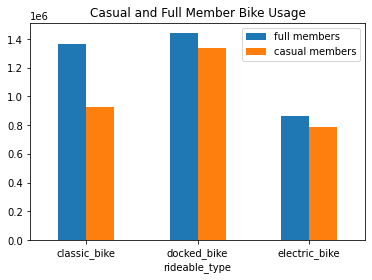

In [ ]:
import matplotlib.pyplot as plt

member_df_size = member_df.groupby('rideable_type')['member_casual'].size()
casual_df_size = casual_df.groupby('rideable_type')['member_casual'].size()

temp_df = pd.concat([member_df_size, casual_df_size], axis=1)

ax = temp_df.plot.bar(rot=0)
ax.legend(['full members', 'casual members'])
ax.set_title('Casual and Full Member Bike Usage')
plt.show()

Marginally more casual members use classic bikes over electric bikes. I don't think the difference is enough to justify targeting one group over the other in a marketing campaign.

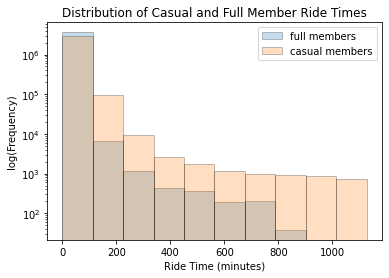

In [ ]:
member_ride_length = member_df.reset_index()['ride_length']
casual_ride_length = casual_df.reset_index()['ride_length']

# round ride_length strings to minutes
member_ride_length = pd.to_timedelta(member_ride_length).astype('timedelta64[m]')
casual_ride_length = pd.to_timedelta(casual_ride_length).astype('timedelta64[m]')

# remove outliers (>3 SDs from mean and less than 0)
member_index = member_ride_length.index[
    (member_ride_length > (member_ride_length.mean() + 3 * member_ride_length.std())) | (member_ride_length < 0)]
casual_index = casual_ride_length.index[
    (casual_ride_length > (casual_ride_length.mean() + 3 * casual_ride_length.std())) | (casual_ride_length < 0)]

member_ride_length.drop(labels=member_index, inplace=True)
casual_ride_length.drop(labels=casual_index, inplace=True)

temp_df = pd.concat([member_ride_length, casual_ride_length], axis=1)
temp_df.set_axis(['full members', 'casual members'], axis='columns', inplace=True)

temp_df.plot.hist(alpha=0.25, ec='black', logy=True)
plt.xlabel('Ride Time (minutes)')
plt.ylabel('log(Frequency)')
plt.title('Distribution of Casual and Full Member Ride Times')
plt.show()

This plot shows the distribution of ride durations for all members. This information ultimately didn't contribute to my conclusion, though it shows that casual members typically take longer rides than full members, which is reinforced by a visual created later. Notice that I removed negative values (where ended_at is earlier than started_at) and outliers as defined as those values greater than three standard deviations from the mean.

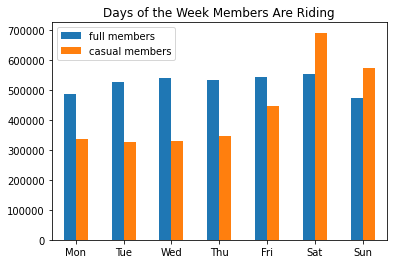

In [ ]:
member_day_size = member_df.groupby('day_of_week')['member_casual'].size()
casual_day_size = casual_df.groupby('day_of_week')['member_casual'].size()

temp_df = pd.concat([member_day_size, casual_day_size], axis=1)

temp_df.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = temp_df.plot.bar(rot=0)
ax.legend(['full members', 'casual members'])
ax.set_title('Days of the Week Members Are Riding')
plt.show()

Some of the key differences between full members and casual members started to become clear to me with this plot. Here we see that full members use Divvy  about the same amount every day, whereas casual members have significantly lower usage than full members on weekdays with a sharp increase on the weekends. This suggests to me that casual members use Divvy mostly for leisure, or at least to reach leisurely activities. Full members, on the other hand, use Divvy more on a routine, perhaps for commute or daily exercise.

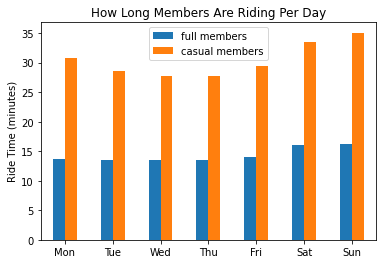

In [ ]:
temp_member_df = member_df.reset_index()
temp_casual_df = casual_df.reset_index()

# round ride_length strings to minutes
temp_member_df['ride_length'] = pd.to_timedelta(temp_member_df['ride_length']).astype('timedelta64[m]')
temp_casual_df['ride_length'] = pd.to_timedelta(temp_casual_df['ride_length']).astype('timedelta64[m]')

# remove outliers (>3 SDs from mean and less than 0)
member_index = temp_member_df['ride_length'].index[
    (temp_member_df['ride_length'] > (temp_member_df['ride_length'].mean() + 3 * temp_member_df['ride_length'].std())) | (temp_member_df['ride_length'] < 0)]
casual_index = temp_casual_df['ride_length'].index[
    (temp_casual_df['ride_length'] > (temp_casual_df['ride_length'].mean() + 3 * temp_casual_df['ride_length'].std())) | (temp_casual_df['ride_length'] < 0)]

temp_member_df.drop(labels=member_index, inplace=True)
temp_casual_df.drop(labels=casual_index, inplace=True)

member_ride_length = temp_member_df.groupby('day_of_week')['ride_length'].mean()
casual_ride_length = temp_casual_df.groupby('day_of_week')['ride_length'].mean()

temp_df = pd.concat([member_ride_length, casual_ride_length], axis=1)

temp_df.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = temp_df.plot.bar(rot=0, ylabel='Ride Time (minutes)', legend=True)
ax.legend(['full members', 'casual members'])
ax.set_title('How Long Members Are Riding Per Day')
plt.show()

Here we see that full members typically take rides lasting from 10 to 15 minutes, but casual members takes rides lasting from 25 to 30 minutes for each day of the week. Full member ride times are quite steady from day to day, whereas casual member ride times dip in the middle of the week and increase on the weekend. The ride times themselves aren't very informative, but the trend in ride times reinforces the idea that full members use Divvy on a routine basis, for the same trip day after day, and casual members ride more erratically, which again suggest that they're using Divvy for leisure. Again, I removed outliers and negative values. 

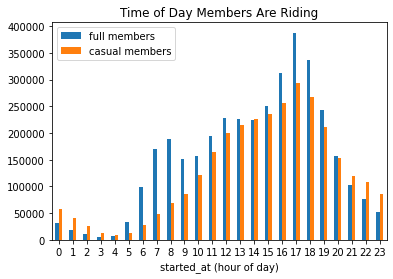

In [ ]:
temp_member_df = member_df.reset_index()
temp_casual_df = casual_df.reset_index()

temp_member_df['started_at'] = pd.to_datetime(temp_member_df['started_at']).dt.hour
temp_casual_df['started_at'] = pd.to_datetime(temp_casual_df['started_at']).dt.hour

member_df_size = temp_member_df.groupby('started_at')['member_casual'].size()
casual_df_size = temp_casual_df.groupby('started_at')['member_casual'].size()

temp_df = pd.concat([member_df_size, casual_df_size], axis=1)

ax = temp_df.plot.bar(rot=0)
ax.legend(['full members', 'casual members'])
ax.set_title('Time of Day Members Are Riding')
plt.xlabel('started_at (hour of day)')
plt.show()

This plot shows the most common hour of the day that members begin their rides. We see both casual and full members peak in usage at 5:00pm (17), though full members have a smaller peak in the morning, from  around 7:00am to 9:00am. Again, this suggests that casual members use Divvy leisurely--in the late afternoon when most people are off work--and full members use Divvy more routinely, during both morning and afternoon commute times. The higher peak at 5:00pm suggests that full members also use Divvy for leisurely activities. 

NB: I didn't clean start times corresponding to negative ```ride_length``` values (potentially invalid start times) to create this chart because, according to the below SQLite query, there are 10,461 negative ```ride_length``` values, which is just 0.16% of the total of 6,714,968. 

```sql
SELECT 
	COUNT(*),
	(SELECT COUNT(ride_length)
	FROM "divvy-tripdata"
	WHERE ride_length LIKE '-% days %') AS negative_days
FROM "divvy-tripdata"
```

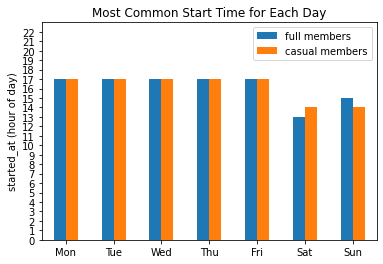

In [ ]:
temp_member_df = member_df.reset_index()
temp_casual_df = casual_df.reset_index()

temp_member_df['started_at'] = pd.to_datetime(temp_member_df['started_at']).dt.hour
temp_casual_df['started_at'] = pd.to_datetime(temp_casual_df['started_at']).dt.hour

member_df_time = temp_member_df.groupby('day_of_week')['started_at'].value_counts()
casual_df_time = temp_casual_df.groupby('day_of_week')['started_at'].value_counts()

max_list = []
for i in range(7):
    max_list.append([member_df_time[i].idxmax(), casual_df_time[i].idxmax()])

temp_df = pd.DataFrame(max_list, columns=['full members', 'casual members'])
temp_df.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = temp_df.plot.bar(rot=0)
ax.legend(['full members', 'casual members'])
ax.set_title('Most Common Start Time for Each Day')
plt.ylabel('started_at (hour of day)')
ax.set_ylim(0, 23)
plt.yticks(range(23))
plt.show()

This plot is a complement to the previous one. We also see that both casual and full members ride a bit earlier on the weekends.

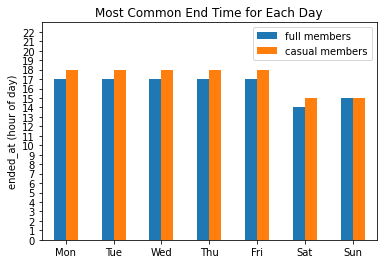

In [ ]:
temp_member_df = member_df.reset_index()
temp_casual_df = casual_df.reset_index()

temp_member_df['ended_at'] = pd.to_datetime(temp_member_df['ended_at']).dt.hour
temp_casual_df['ended_at'] = pd.to_datetime(temp_casual_df['ended_at']).dt.hour

member_df_time = temp_member_df.groupby('day_of_week')['ended_at'].value_counts()
casual_df_time = temp_casual_df.groupby('day_of_week')['ended_at'].value_counts()

max_list = []
for i in range(7):
  max_list.append([member_df_time[i].idxmax(), casual_df_time[i].idxmax()])

temp_df = pd.DataFrame(max_list, columns=['full members', 'casual members'])
temp_df.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = temp_df.plot.bar(rot=0)
ax.legend(['full members', 'casual members'])
ax.set_title('Most Common End Time for Each Day')
plt.ylabel('ended_at (hour of day)')
ax.set_ylim(0, 23)
plt.yticks(range(23))
plt.show()

This plot shows the most common hour when members finish their rides. 

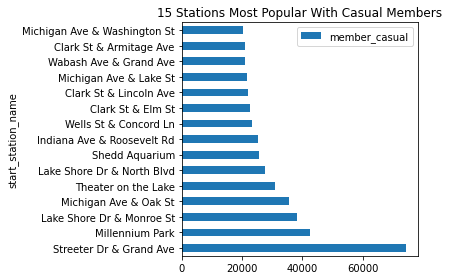

In [ ]:
n = 15

casual_df_size_start = casual_df.groupby('start_station_name')['member_casual'].size().nlargest(n)
casual_df_size_start = pd.DataFrame(casual_df_size_start)

ax = casual_df_size_start.plot.barh()
ax.set_title('{} Stations Most Popular With Casual Members'.format(n))
plt.tight_layout()
plt.show()

Finally, this plot shows the top 15 most popular stations with casual members. These are the physical locations where advertisement campaigns to convert casual members to full members should be focused. To see more or fewer stations, change the value of ```n``` in the above code block.

### Information I Didn't Include

I considered showing the distance that members rode using the coordinates given in the data. However, I ultimately decided against it because all distance information would be either Euclidian distance, geodesic distance given by something such as ```geopy.distance.distance()``` ([documentation](https://geopy.readthedocs.io/en/stable/#module-geopy.distance)), or a similar distance formula, and therefore would not take into account the riders' routes. In this case, I think ride time is much more informative. In addition, it doesn't account for instances where the start station is the same as the end station (of which there are 585,054 instances, according to a SQLite query), or for leisurely rides, where I don't imagine members are always taking a direct route.

## Conclusions

As stated above when analyzing the data, I think that casual members are, broadly speaking, using Divvy for non-routine trips and full members are using Divvy for routine trips. An advertising campaign could show casual members that one can use Divvy for routine activities as well as leisure activites while explaining that a subscription is the most cost effective option for routine rides. Other factors such as the environmental impact of driving or taking public transport vs. biking could be emphasized as well. 

### More Data

The Divvy data does not include information on individual riders. Anonymized rider data would give us further insight because I believe repeat casual customers is a key demographic in more accurately answering the question of how to convert casual members into full members. Other very useful data would be route information. However, this would require significant overhead because Divvy would have to outfit each bike with a GPS unit and they'd have to implement a system to store the GPS data.